In [25]:
#import libraries


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpt  
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
#get file
datafile = pd.read_csv(r"C:\Users\nayton\Documents\Scripts\Imports\dataload.csv")  #r (to produce a raw string)



datafile.tail(7)


,Disease,Age,Gender,Latitude,Longitude,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Severity
783,Postpartum Depression,45,Male,44.267,-95.548,Sadness,Fatigue,Difficulty bonding with baby,NaN,75.0
784,Restless Legs Syndrome (RLS),55,Female,44.586,-96.781,Uncomfortable sensation in legs,Constant urge to move legs,NaN,80.0,NaN
785,Sjogren's Syndrome,35,Male,46.491,-99.016,Dry eyes,Dry mouth,Fatigue,NaN,85.0
786,Spinal Muscular Atrophy,25,Female,44.903,-99.937,Weakness,Difficulty walking,Breathing problems,NaN,70.0
787,Temporomandibular Joint Disorder (TMJ),50,Male,45.129,-94.714,Jaw pain,Difficulty chewing,NaN,75.0,NaN
788,Tourette Syndrome,55,Female,47.819,-96.562,Tics (involuntary movements or sounds),NaN,NaN,80.0,NaN
789,Turner Syndrome,40,Male,42.145,-94.305,Short stature,Webbed neck,NaN,85.0,NaN


In [4]:
#View first few rows
datafile.head(7)

,Disease,Age,Gender,Latitude,Longitude,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Severity
0,Common Cold,45,Male,42.387,-95.223,Runny nose,Sneezing,NaN,60.0,NaN
1,Flu,63,Female,41.722,-97.154,Fever,Cough,Fatigue,NaN,80.0
2,Bronchitis,27,Male,44.586,-96.781,Cough,Shortness of breath,NaN,NaN,70.0
3,Migraine,57,Female,43.251,-99.042,Headache,Nausea,NaN,NaN,90.0
4,Allergy,31,Male,45.129,-94.714,Itchy eyes,Skin rash,NaN,50.0,NaN
5,Flu,53,Female,47.837,-97.872,Cough,Shortness of breath,NaN,NaN,80.0
6,Common Cold,22,Male,48.295,-97.349,Runny nose,Sneezing,NaN,60.0,NaN


In [5]:
#View last few rows
datafile.tail(7)

,Disease,Age,Gender,Latitude,Longitude,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Severity
783,Postpartum Depression,45,Male,44.267,-95.548,Sadness,Fatigue,Difficulty bonding with baby,NaN,75.0
784,Restless Legs Syndrome (RLS),55,Female,44.586,-96.781,Uncomfortable sensation in legs,Constant urge to move legs,NaN,80.0,NaN
785,Sjogren's Syndrome,35,Male,46.491,-99.016,Dry eyes,Dry mouth,Fatigue,NaN,85.0
786,Spinal Muscular Atrophy,25,Female,44.903,-99.937,Weakness,Difficulty walking,Breathing problems,NaN,70.0
787,Temporomandibular Joint Disorder (TMJ),50,Male,45.129,-94.714,Jaw pain,Difficulty chewing,NaN,75.0,NaN
788,Tourette Syndrome,55,Female,47.819,-96.562,Tics (involuntary movements or sounds),NaN,NaN,80.0,NaN
789,Turner Syndrome,40,Male,42.145,-94.305,Short stature,Webbed neck,NaN,85.0,NaN


In [6]:
#columns and row
datafile.shape

(790, 10)

In [7]:
#what columns do I have
datafile.columns.tolist()

#data type and nulls
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Disease    790 non-null    object 
 1   Age        790 non-null    int64  
 2   Gender     790 non-null    object 
 3   Latitude   790 non-null    float64
 4   Longitude  790 non-null    float64
 5   Symptom_1  790 non-null    object 
 6   Symptom_2  784 non-null    object 
 7   Symptom_3  486 non-null    object 
 8   Symptom_4  269 non-null    float64
 9   Severity   521 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 61.8+ KB


In [8]:
# Obs: I have an issue with symptom_4 being continuous move to Severity
datafile.isnull().sum()

Disease        0
Age            0
Gender         0
Latitude       0
Longitude      0
Symptom_1      0
Symptom_2      6
Symptom_3    304
Symptom_4    521
Severity     269
dtype: int64

In [9]:
# Does Symptom_4 + Serverity = total record
Sym_4 = pd.isnull(datafile["Symptom_4"]).sum()
Sev = pd.isnull(datafile["Severity"]).sum()

Sym_4 + Sev  #790

np.int64(790)

In [10]:
#Correct
#Move Symptom_4 to Severity
datafile.head(10)

datafile['Severity']=  datafile['Severity'].fillna(datafile['Symptom_4'])

datafile.head(10)


,Disease,Age,Gender,Latitude,Longitude,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Severity
0,Common Cold,45,Male,42.387,-95.223,Runny nose,Sneezing,NaN,60.0,60.0
1,Flu,63,Female,41.722,-97.154,Fever,Cough,Fatigue,NaN,80.0
2,Bronchitis,27,Male,44.586,-96.781,Cough,Shortness of breath,NaN,NaN,70.0
3,Migraine,57,Female,43.251,-99.042,Headache,Nausea,NaN,NaN,90.0
4,Allergy,31,Male,45.129,-94.714,Itchy eyes,Skin rash,NaN,50.0,50.0
5,Flu,53,Female,47.837,-97.872,Cough,Shortness of breath,NaN,NaN,80.0
6,Common Cold,22,Male,48.295,-97.349,Runny nose,Sneezing,NaN,60.0,60.0
7,Migraine,35,Female,44.903,-99.937,Headache,Nausea,NaN,NaN,90.0
8,Allergy,68,Male,42.804,-94.554,Itchy eyes,Skin rash,NaN,50.0,50.0
9,Bronchitis,47,Female,49.168,-96.209,Cough,Shortness of breath,NaN,NaN,70.0


In [11]:
#Check that Severity is not null
Sev = pd.isnull(datafile["Severity"]).sum()
Sev

#Remove Symptom_4
datafile = datafile.drop(columns=['Symptom_4'])

In [12]:
datafile.shape

(790, 9)

In [13]:
datafile.describe() 


,Age,Latitude,Longitude,Severity
count,790.000000,790.000000,790.000000,790.000000
mean,44.948101,44.845775,-96.930827,77.677215
std,13.501672,2.019071,1.740883,10.318913
min,5.000000,41.396000,-99.937000,50.000000
25%,35.000000,42.893000,-98.405000,70.000000
50%,45.000000,44.903000,-96.781000,80.000000
75%,55.000000,46.491000,-95.548000,85.000000
max,75.000000,49.168000,-94.012000,95.000000


In [14]:

#remove Latitude and Longitude as continuous to categorical
datafile['Latitude'] = datafile['Latitude'].astype(str)
datafile['Longitude'] = datafile['Longitude'].astype(str)

datafile.describe() 

,Age,Severity
count,790.000000,790.000000
mean,44.948101,77.677215
std,13.501672,10.318913
min,5.000000,50.000000
25%,35.000000,70.000000
50%,45.000000,80.000000
75%,55.000000,85.000000
max,75.000000,95.000000


In [33]:
#remove nulls from categorical
datafile['Symptom_3']=  datafile['Symptom_3'].fillna('')
datafile['Symptom_2']=  datafile['Symptom_2'].fillna('')
print(datafile.isnull().sum())

Disease      0
Age          0
Gender       0
Latitude     0
Longitude    0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Severity     0
dtype: int64


In [15]:
#Now there is only continuous values 
datafile.describe()

datafile.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Disease    790 non-null    object 
 1   Age        790 non-null    int64  
 2   Gender     790 non-null    object 
 3   Latitude   790 non-null    object 
 4   Longitude  790 non-null    object 
 5   Symptom_1  790 non-null    object 
 6   Symptom_2  784 non-null    object 
 7   Symptom_3  486 non-null    object 
 8   Severity   790 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 55.7+ KB


In [16]:
datafile.duplicated().sum()
datafile.nunique()


Disease      216
Age           31
Gender         2
Latitude      36
Longitude     36
Symptom_1    120
Symptom_2    125
Symptom_3     89
Severity       9
dtype: int64

In [21]:
#342 dups. What to do? I will remove
duplicate_rows = datafile[datafile.duplicated()]
duplicate_rows  

#448 records
datafile2 = datafile.drop_duplicates()
datafile2 

datafile = datafile2

In [24]:

datafile.describe() 
datafile.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 448 entries, 0 to 789
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Disease    448 non-null    object 
 1   Age        448 non-null    int64  
 2   Gender     448 non-null    object 
 3   Latitude   448 non-null    object 
 4   Longitude  448 non-null    object 
 5   Symptom_1  448 non-null    object 
 6   Symptom_2  444 non-null    object 
 7   Symptom_3  282 non-null    object 
 8   Severity   448 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.0+ KB


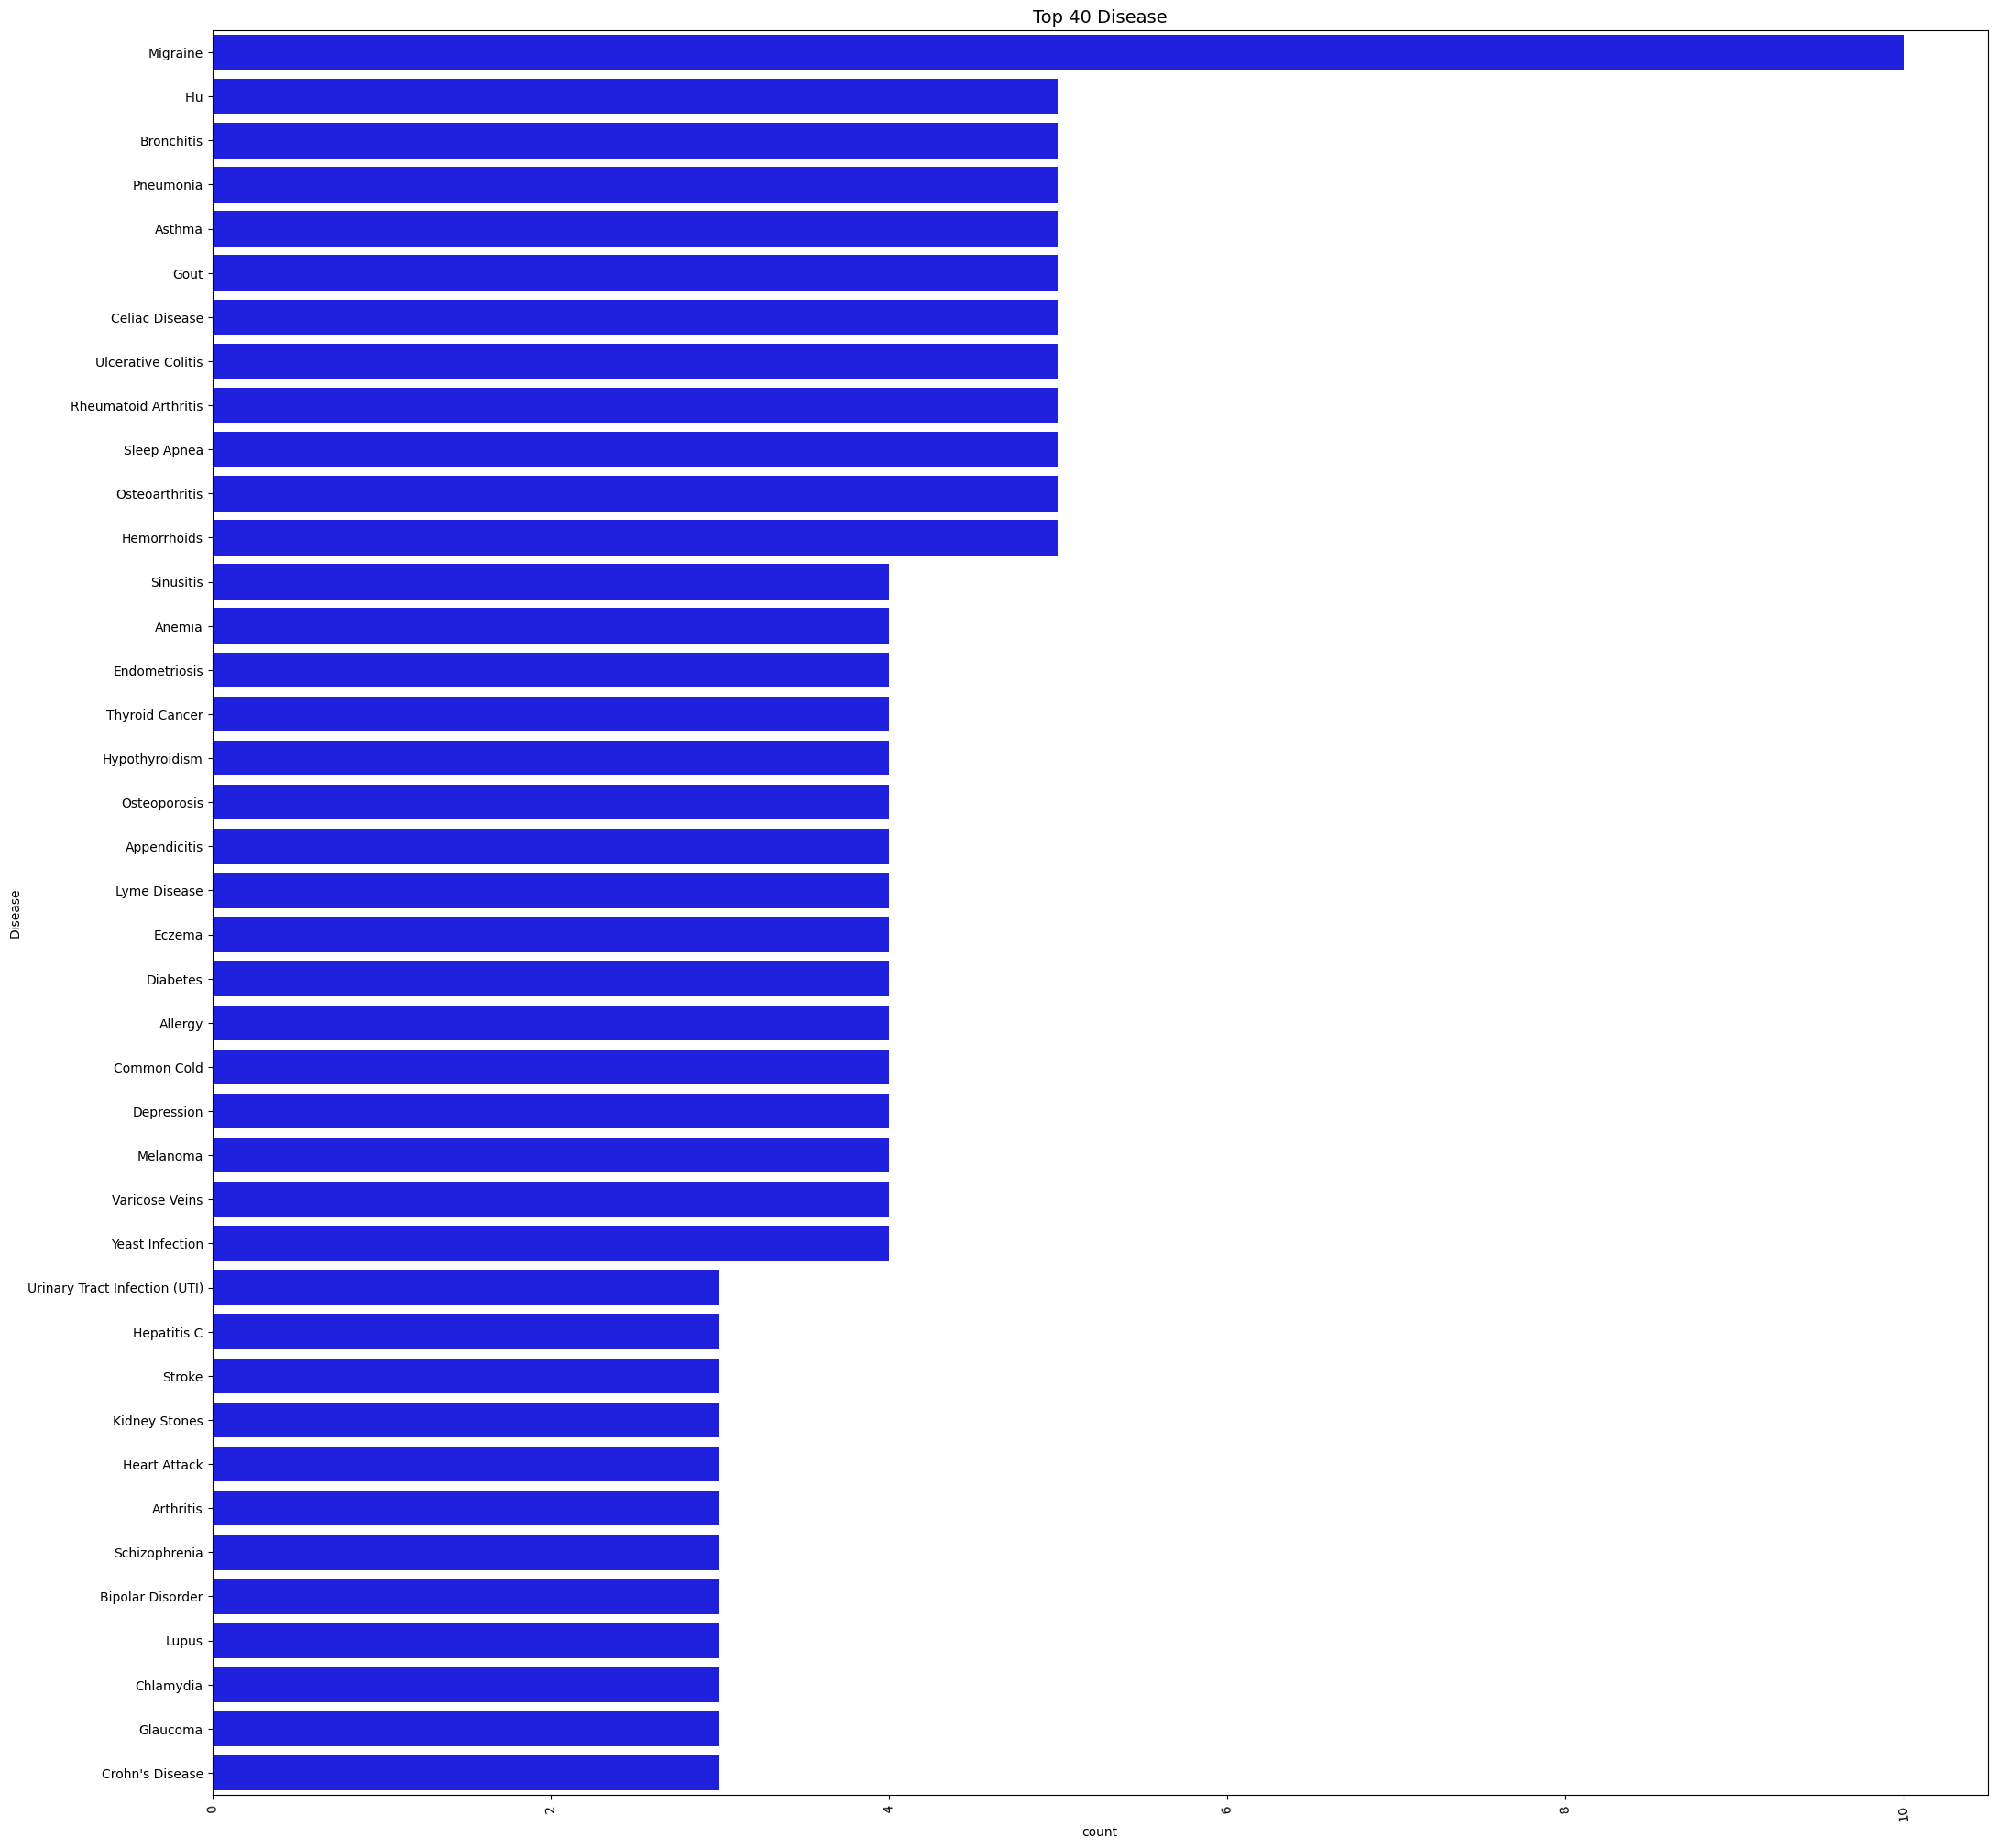

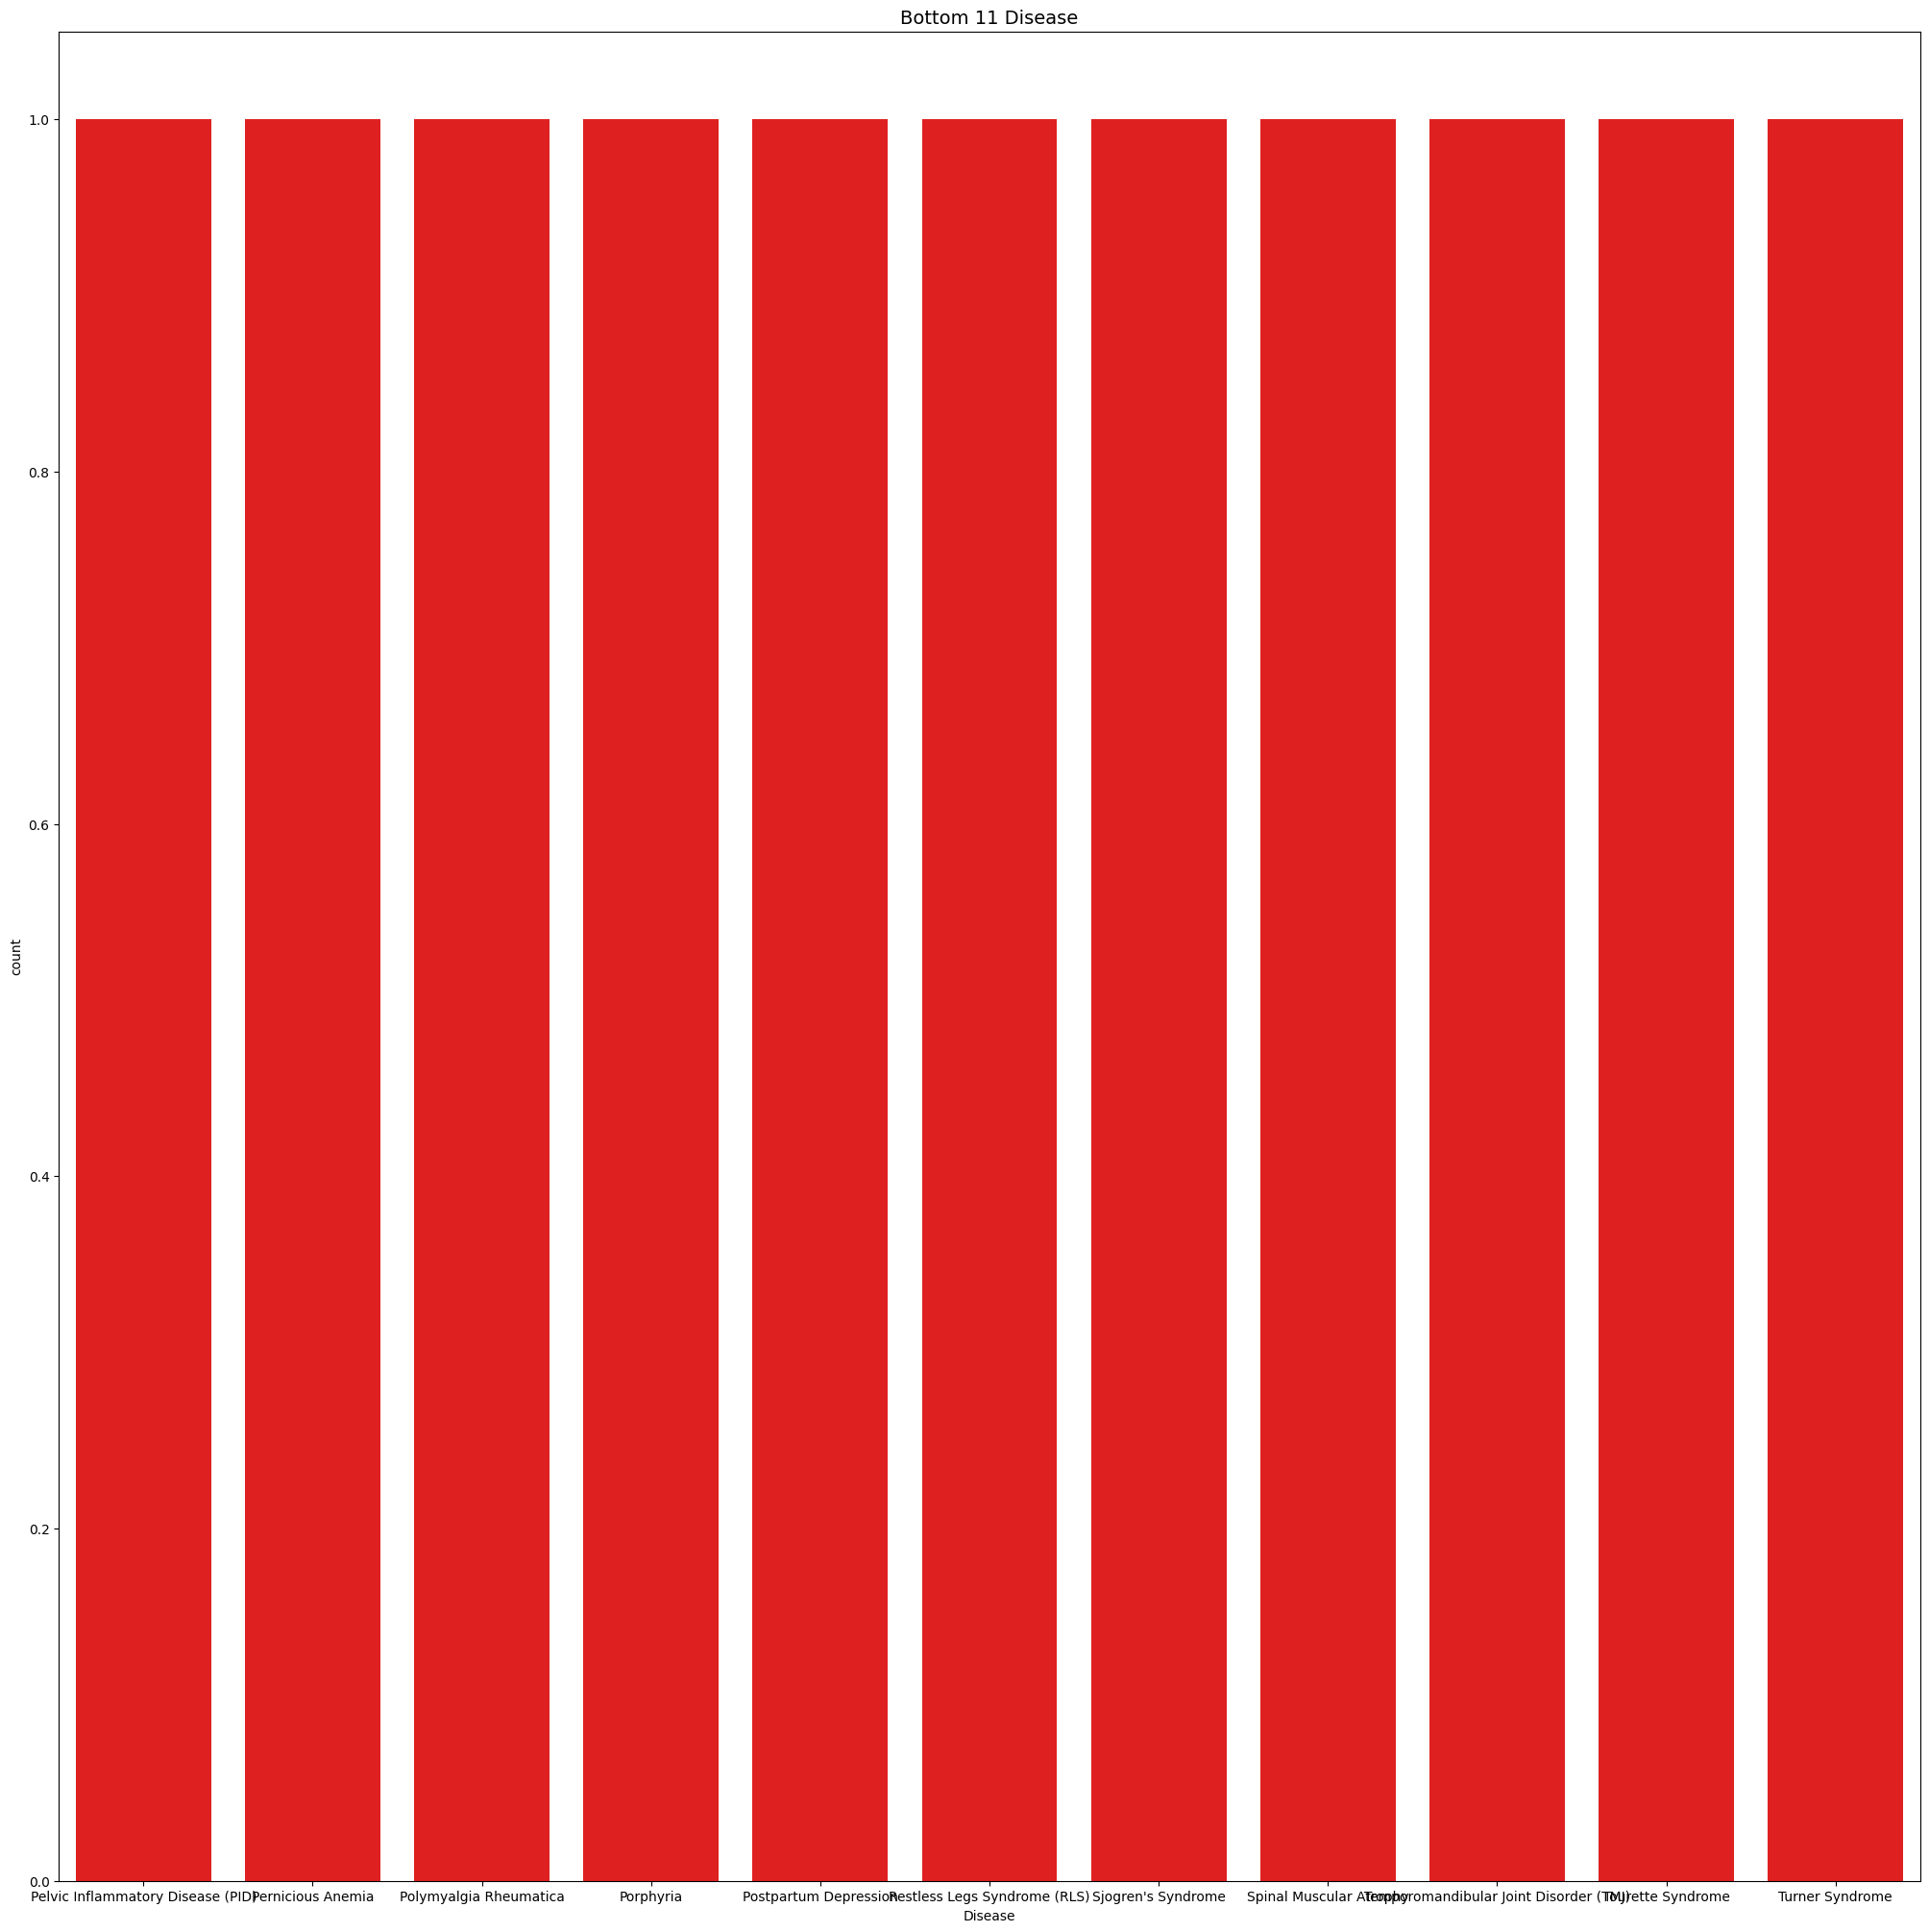

In [26]:
#-----------start EPA Analysis
#Univariate analysis -- one variable at a time any patterns or trends. 

#Disease
mpt.figure(figsize=(25, 25)) 
mpt.title('Top 40 Disease', fontsize=14) 
sb.countplot( y = 'Disease', data = datafile, 
             color = 'blue', 
             order = datafile['Disease'].value_counts().head(40).index);
mpt.xticks(rotation=95)
mpt.show()

mpt.figure(figsize=(25, 25)) 
mpt.title('Bottom 11 Disease', fontsize=14) 
sb.countplot( x = 'Disease', data = datafile, 
             color = 'red', 
             order = datafile['Disease'].value_counts().tail(11).index);

mpt.show()


In [ ]:
#Symptoms
symptoms_combo =  datafile['Symptom_1'].map(str) + '-' + datafile['Symptom_2'].map(str) + '-' + datafile['Symptom_3'].map(str)
symptoms_combo = pd.DataFrame(symptoms_combo, columns=['Symptoms'])
mpt.figure(figsize=(15, 15)) 
mpt.title('Top 11 Symptoms', fontsize=14) 
sb.countplot( y = 'Symptoms', data = symptoms_combo, 
             color = 'blue', 
             order = symptoms_combo['Symptoms'].value_counts().head(40).index);
mpt.xticks(rotation=95)
mpt.show()

In [ ]:
#Severity
mpt.figure(figsize=(10,5)) 
mpt.title('Severity Plot', fontsize=14) 
sb.countplot(x="Severity", data=datafile, palette=('BuPu')) 
mpt.xlabel("Severity", fontsize=12) 
mpt.ylabel("Count", fontsize=12) 
mpt.xticks(fontsize=12) 
mpt.yticks(fontsize=12) 
mpt.show()


In [ ]:
#Gender equal
mpt.figure(figsize=(12, 10)) 
mpt.title('Gender Plot', fontsize=14) 
sb.countplot(x="Gender", data=datafile, palette=('Accent')) 
#mpt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12) 
mpt.ylabel("Count", fontsize=12) 
mpt.xticks(fontsize=12) 
mpt.yticks(fontsize=12) 
mpt.show()

In [ ]:
#Age
mpt.figure(figsize=(10,5)) 
mpt.title('Age Plot', fontsize=14) 
sb.countplot(x="Age", data=datafile, palette=('CMRmap')) 
#mpt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12) 
mpt.ylabel("Count", fontsize=12) 
mpt.xticks(fontsize=12) 
mpt.yticks(fontsize=12) 
mpt.show()

In [ ]:

#----Bivariate -- correlation analysis relationship between two variables

sb.countplot(x=datafile['Age'], data=datafile, legend=True ,hue=datafile['Gender'])
mpt.show()
sb.scatterplot(x=datafile['Age'] , y=datafile['Severity'])
mpt.show()




In [ ]:
#Outliers in Severity, Gender, age
sb.boxplot(x='Severity', y='Gender', data=datafile)
mpt.show()
sb.boxplot(x='Age', y='Gender', data=datafile)
mpt.show()

In [ ]:
#Look into Disease based on Severity and Age
sb.boxplot(x='Disease', y='Severity', legend=True , data=datafile, 
           order=datafile['Disease'].value_counts().head(40).index)
mpt.xticks(rotation=95, fontsize=7)
mpt.show()
sb.boxplot(x='Disease', y='Age', legend=True , data=datafile, 
           order=datafile['Disease'].value_counts().head(40).index)
mpt.xticks(rotation=95, fontsize=7)
mpt.show()

In [ ]:
#Which Severity effect female v male?
sb.countplot(x=datafile['Severity'], data=datafile, legend=True ,hue=datafile['Gender'])
mpt.show()
sb.scatterplot(x=datafile['Severity'] , y=datafile.index,  hue=datafile['Gender'])
mpt.show()

#Which disease effect female v male?
sb.countplot(y=datafile['Disease'], data=datafile, legend=True ,hue=datafile['Gender'],
             order = datafile['Disease'].value_counts().head(40).index)
mpt.xticks(rotation=95, fontsize=7)
mpt.show()

In [ ]:
#Which Symptoms are in different diseases?
sb.catplot(x="Age", y=datafile['Symptom_1'].count(), hue="Gender",kind="bar", data=datafile, 
           order = datafile['Disease'].value_counts().head(40).index)
mpt.show()

In [ ]:
#-----Multivariate --  relationships between three or more variables

sb.catplot(x="Age", y="Severity", hue="Gender",kind="bar", data=datafile)
mpt.show()

sb.catplot(x='Symptom_1', y="Disease", hue="Gender",kind="bar", data=datafile, 
     order = datafile['Disease'].value_counts().head(40).index)
mpt.show()

sb.catplot(x="Age", y="Disease", hue="Gender",kind="bar", data=datafile, 
           order = datafile['Disease'].value_counts().head(40).index)
mpt.show()
sb.catplot(x="Age", y="Disease", hue="Gender",kind="bar", data=datafile, 
           order = datafile['Disease'].value_counts().tail(40).index)
mpt.show()



In [ ]:
#Any symptoms in multiple disease
sb.heatmap(pd.crosstab(datafile['Symptom_1'], datafile['Disease'], margins=True,  
               values=datafile['Severity'], aggfunc=pd.Series.count)            
            ,cmap="Pastel1", annot=True, cbar=False)
mpt.show()

pd.pivot_table(datafile,
               columns= ['Symptom_1','Symptom_2','Symptom_3'],
                       index=['Disease'],
                                aggfunc=[np.sum])

In [ ]:
categorical_cols = ['Gender', 'Disease', 'Symptom_1','Symptom_2','Symptom_3' ]  # identify categorical columns
df_onehot = pd.get_dummies(datafile, columns=categorical_cols)
correlation_matrix = df_onehot.corr()
print(correlation_matrix)

dataplot = sb.heatmap( correlation_matrix, cmap="Pastel1", annot=True)
mpt.show()

#Finding the correlation between variables
pearsonCorr = df_onehot.corr(method='pearson')
fig = mpt.subplots(figsize=(14,8))
sb.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Pastel1", annot=True, linewidth=0.1)
mpt.title("Pearson Correlation")
mpt.show()

In [34]:
# Removing the Positioning information to help predict Disease
DataModel = datafile.drop(columns=['Latitude','Longitude'])

In [35]:
#dependent variable. A target variable is the outcome Disease
#Create dataset
Y_data = DataModel['Disease'].values
X_data = DataModel.drop(columns=['Disease']).values

In [36]:
# Splitting the X and Y into the Training set and Testing set 20 21
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.5, random_state=2)
print('Train shape:', X_train.shape, Y_train.shape)
print('Test shape:', X_test.shape, Y_test.shape)

Train shape: (224, 6) (224,)
Test shape: (224, 6) (224,)


In [37]:
#prepare inputs using Ordinal to label to an integer value.
OEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#OEncoder.fit(X_train)
X_train_encode = OEncoder.fit_transform(X_train)
X_test_encode = OEncoder.fit_transform(X_test)

LBencoder = LabelEncoder()
Y_train_encode = LBencoder.fit_transform(Y_train)
Y_test_encode = LBencoder.fit_transform(Y_test)

print('Train shape:', X_train_encode.shape, Y_train_encode.shape)
print('Test shape:', X_test_encode.shape, Y_test_encode.shape)


Train shape: (224, 6) (224,)
Test shape: (224, 6) (224,)


In [38]:
from sklearn.svm import SVC
# SVM Classifier Support Vector Classifier is a discriminative classifier
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(X_train_encode, Y_train_encode)
SVM_preds = SVMmodel.predict(X_test_encode)

In [39]:
from sklearn.naive_bayes import GaussianNB
# Training and testing Naive Bayes Classifier probabilistic machine learning algorithm
NBCmodel = GaussianNB()
NBCmodel.fit(X_train_encode, Y_train_encode)
NBC_preds = NBCmodel.predict(X_test_encode)

In [40]:
from sklearn.ensemble import RandomForestClassifier 
# Training and testing Random Forest Classifier uses multiple decision trees to make the classification
RFCmodel = RandomForestClassifier(random_state=45)     # same as NBC ~5
#RFCmodel = RandomForestClassifier(random_state=20)  # same as SVM ~14
RFCmodel.fit(X_train_encode, Y_train_encode)
RFC_preds = RFCmodel.predict(X_test_encode)

In [ ]:
# List out the Classification models
#How many were true?
#How many positive were true?
#mean of both *Support Vector Machine
print("Accuracy of Support Vector Machine on test: ",
      accuracy_score(Y_test_encode, SVM_preds)*100)
print("Precision of Support Vector Machine: ",
      precision_score(Y_test_encode, SVM_preds, average='weighted')*100)
print("Recall of Support Vector Machine: ",
      recall_score(Y_test_encode, SVM_preds, average='weighted')*100)
print("F1-Score of Support Vector Machine: ",
      f1_score(Y_test_encode, SVM_preds, average='weighted')*100)

print("Accuracy of Naive Bayes Classifier on test: ",
      accuracy_score(Y_test_encode, NBC_preds)*100)
print("Precision of Naive Bayes Classifier: ",
      precision_score(Y_test_encode, NBC_preds, average='weighted')*100)
print("Recall of Naive Bayes Classifier: ",
      recall_score(Y_test_encode, NBC_preds, average='weighted')*100)
print("F1-Score of Naive Bayes Classifier: ",
      f1_score(Y_test_encode, NBC_preds, average='weighted')*100)

print("Accuracy of Random Forest Classifier  on test: ", 
      accuracy_score(Y_test_encode, RFC_preds)*100)
print("Precision of Random Forest Classifier: ",
      precision_score(Y_test_encode, RFC_preds, average='weighted')*100)
print("Recall of Random Forest Classifier: ",
      recall_score(Y_test_encode, RFC_preds, average='weighted')*100)
print("F1-Score of Random Forest Classifier: ",
      f1_score(Y_test_encode, RFC_preds, average='weighted')*100)


In [ ]:
#Print the confustion Matrix
SVM_confuse_matrix = confusion_matrix(Y_test_encode, SVM_preds)
mpt.figure(figsize=(12,8))
sb.heatmap(SVM_confuse_matrix, annot=True)
mpt.title("Confusion Matrix for SVM Classifier on Test Data")
mpt.show()

NBC_confuse_matrix = confusion_matrix(Y_test_encode, NBC_preds)
mpt.figure(figsize=(12,8))
sb.heatmap(NBC_confuse_matrix, annot=True)
mpt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
mpt.show()

RFC_confuse_matrix = confusion_matrix(Y_test_encode, RFC_preds)
mpt.figure(figsize=(12,8))
sb.heatmap(RFC_confuse_matrix, annot=True)
mpt.title("Confusion Matrix for Random Forest Classifier on Test Data")
mpt.show()

In [ ]:
#---Feature importance
X_dataF = pd.DataFrame(X_data, columns=['Age', 'Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Severity'])
print(X_dataF.head(4))

feat_importances = pd.Series(RFCmodel.feature_importances_, index=X_dataF.columns)
feat_importances.sort_values(ascending=False,inplace=True)

print(feat_importances.sort_values(ascending=False))

mpt.bar( range(len(RFCmodel.feature_importances_)), RFCmodel.feature_importances_)
mpt.xticks(range(len(RFCmodel.feature_importances_)), X_dataF.columns)
mpt.show()
